# **브로커, 복제, ISR(in-sync-replication)**

파티션 단위로 분산처리 수행 - 분산처리의 핵심 '복제' - 카프카의 가용성을 보장하는 방법

모든 브로커에게 데이터를 동이랗게 보내는 것이 아니라 master > slave방향으로 데이터를 복제하는 것 처럼 수행

브로커 (Broker)
카프카가 설치되어 있는 '서버'단위 - 브로커 1개를 모아서 처리할 수 있는 서버 1개(3개 이상의 브로커로 클러스터 구성으로 사용하는것을 권장한다고 함)

파티션 1개_복제가 1인 topic이 존재, 브로커가 3개라면 3개중 1대에 해당 topic의 데이터 저장장

**Replication_파티션의 복제**

replication 1 = partition = 1
replication 2 = 원본 1, 복제본 1
replication 3 = 원본 1, 복제본 2

브로커의 개수에 따라 replication갯수 제한
(ex. 브로커가 3이면 replication은 4가 될 수 없다.)

원본 한개의 파티션 = leader 파티션 // 나머지 파티션들을 follower 파티션

이 파티션들을 합쳐서 ISR(In Sync Replication)

프로듀서가 리더파티션으로 메세지를 전송하고, 리더는 자신을 바라보는 파티션에게 데이터를 복제한다.

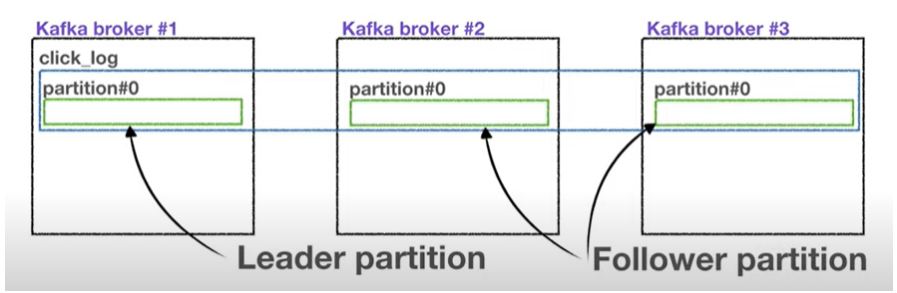

**왜 복제를 사용할까?**

고가용성(장애대응, 데이터유실 방지)

(ex. 브로커가 3개의 카프카에서 복제1이고, 파티션이 1인 topic이 존재하는 경우 만약 브로커가 사용불가하게 된다면 해당 파티션은 복구 불가

but. 복제가 2라면 브로커 한개가 죽더라도 복제본이 존재하므로 복구가능 - 복제본 파티션이 leader파티션 역할을 승계함)

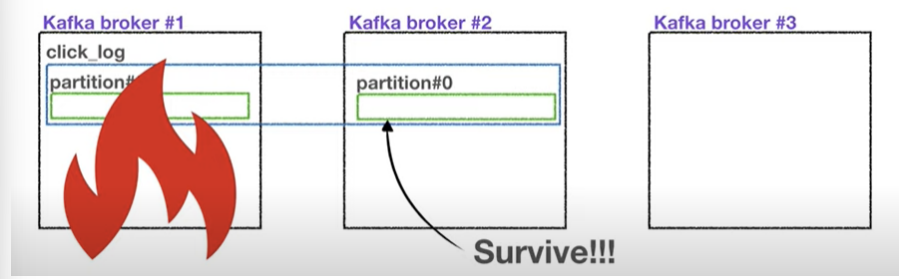

**리더 파티션과 팔로워 파티션의 역할**

프로듀서가 topic의 파티션에 데이터를 전달할 때, 전달받는 주체가 리더 파티션

ack - 프로듀서의 상세옵션(0/1/all을 골라서 사용 가능_replication과의 관계)

ex. ack = 0
leader partition에 데이터를 전달하고, 응답값을 받지않음 // leader partition에 데이터가 정상적으로 전송되었는지, 나머지 파티션에 정상적으로 복제되었는지 알수 없음 //리더파티션으로 전달되는 속도는 빠르지만 리더 파티션의 브로커에 장애가 났을때 제대로 전송되었는지 확인하지 못해서 데이터 유실의 가능성 존재재

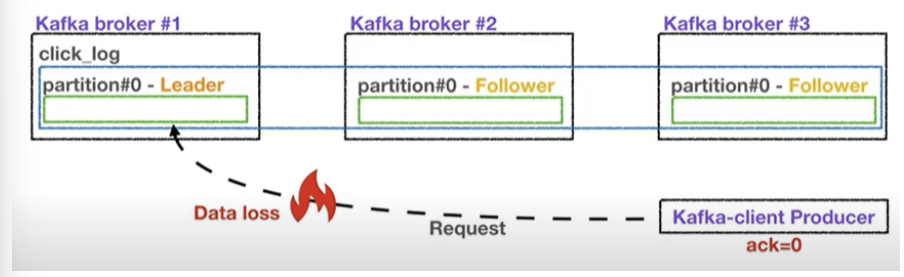

ex. ack = 1 leader partition에 데이터를 전달하고, 정상적으로 전달되었는지 응답값을 받는다. // 나머지 파티션에 정상적으로 복제되었는지 알 수 없음 // 리더파티션이 데이터를 받은 즉시 브로커 장애가 났을 경우 나머지 파티션에 데이터가 미처 전송되지 못한 상태라 데이터 유실의 가능성이 있다.

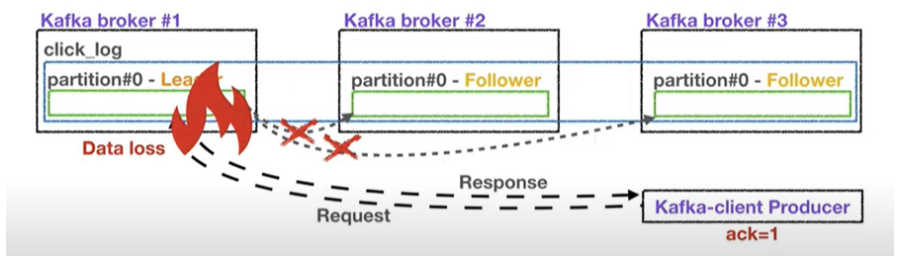

ex. ack = all leader partition에 데이터를 전달하고, 정상적으로 전달이 되었는지 응답값을 받는다. 리더 파티션에 데이터를 보낸 후 나머지 팔로우 파티션에도 데이터가 저장 되는 것을 확인하는 절차를 거친다. // 데이터 유실은 적지만 1과 0에 비해 확인하는 과정이 많아 데이터 전달 속도가 느리다.



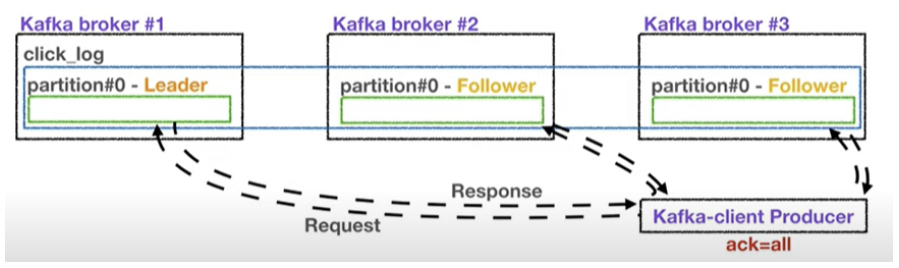

replication이 많을수록 브로커의 리소스 사용량이 많아짐 - 카프카 데이터 처리량과 저장시간(retention date)을 고려해서 replication개수를 정해야 함 - 3개 이상의 브로커 사용시 replication 3 권장장